In [1]:
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 3.5 MB/s 
     |████████████████████████████████| 1.1 MB 29.8 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82830 sha256=2fb48ea1f81828a6fbb9d771482d7afeca7a19a07d32f8abcd050960276eb9fd
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55509 sha256=59115aa1412a84533939163509c23a7194b93965d112842b7ff663640f9fe6c1
  Stored in directory: /root/.cache/pip/wheels/19/bc/eb/974072a56a7082a302f8b4be1ad6d21bf5019235c2eff65928
Successfully built umap-learn pynndescent


In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import umap
import time

In [3]:
mnist = load_digits()

In [7]:
mnist

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [12]:
df = pd.DataFrame(mnist.data)
df.columns = mnist.feature_names
df['target'] = mnist.target
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [5]:
mnist.target

array([0, 1, 2, ..., 8, 9, 8])

[Text(0.5, 1.0, 'perplexity=20')]

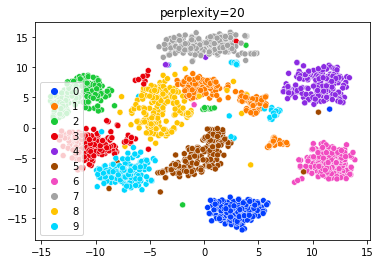

In [ ]:
X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=20).fit_transform(df)
dataX = X_embedded[:,0]
dataY = X_embedded[:,1]
sns.scatterplot(dataX, dataY, hue=mnist.target, palette='bright').set(title='perplexity=20')


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'perplexity=35')]

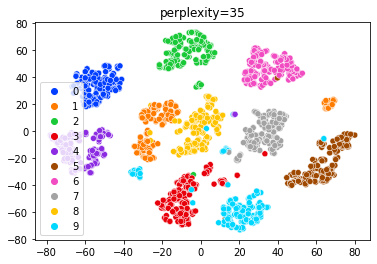

In [ ]:
X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=35).fit_transform(df)
dataX = X_embedded[:,0]
dataY = X_embedded[:,1]
sns.scatterplot(dataX, dataY, hue=mnist.target, palette='bright').set(title='perplexity=35')


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


hello


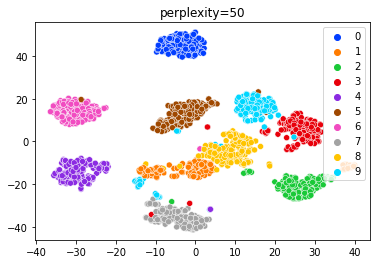

In [ ]:
start_time = time.time()
X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=50).fit_transform(df)
time_tsne = time.time() - start_time
dataX = X_embedded[:,0]
dataY = X_embedded[:,1]
sns.scatterplot(dataX, dataY, hue=mnist.target, palette='bright').set(title='perplexity=50')


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'n_neighbors=50, min_dist=0.3')]

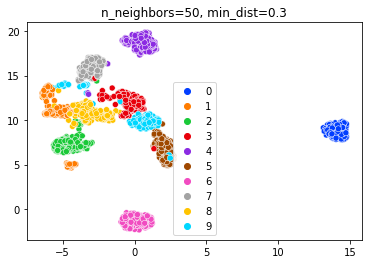

In [ ]:
start_time = time.time()
X_embedded = umap.UMAP(n_neighbors=50,
                       min_dist=0.3,
                       n_components=2).fit_transform(df)
time_umap = time.time() - start_time
dataX = X_embedded[:,0]
dataY = X_embedded[:,1]
sns.scatterplot(dataX, dataY, hue=mnist.target, palette='bright').set(title='n_neighbors=50, min_dist=0.3')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'n_neighbors=15, min_dist=0.1')]

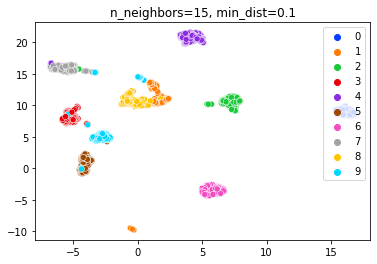

In [ ]:
X_embedded = umap.UMAP(n_neighbors=15,
                       min_dist=0.1,
                       n_components=2).fit_transform(df)
dataX = X_embedded[:,0]
dataY = X_embedded[:,1]
sns.scatterplot(dataX, dataY, hue=mnist.target, palette='bright').set(title='n_neighbors=15, min_dist=0.1')


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'n_neighbors=100, min_dist=0.7')]

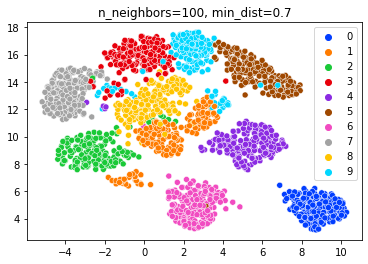

In [ ]:
X_embedded = umap.UMAP(n_neighbors=100,
                       min_dist=0.7,
                       n_components=2).fit_transform(df)
dataX = X_embedded[:,0]
dataY = X_embedded[:,1]
sns.scatterplot(dataX, dataY, hue=mnist.target, palette='bright').set(title='n_neighbors=100, min_dist=0.7')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'n_neighbors=100, min_dist=0.1')]

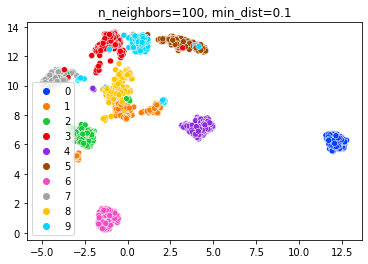

In [ ]:
X_embedded = umap.UMAP(n_neighbors=100,
                       min_dist=0.1,
                       n_components=2).fit_transform(df)
dataX = X_embedded[:,0]
dataY = X_embedded[:,1]
sns.scatterplot(dataX, dataY, hue=mnist.target, palette='bright').set(title='n_neighbors=100, min_dist=0.1')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'n_neighbors=10, min_dist=0.9')]

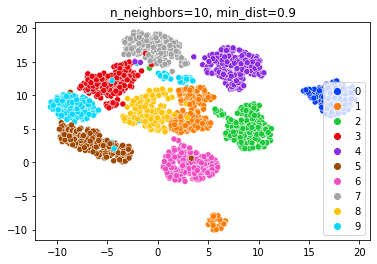

In [ ]:
X_embedded = umap.UMAP(n_neighbors=10,
                       min_dist=0.9,
                       n_components=2).fit_transform(df)
dataX = X_embedded[:,0]
dataY = X_embedded[:,1]
sns.scatterplot(dataX, dataY, hue=mnist.target, palette='bright').set(title='n_neighbors=10, min_dist=0.9')

In [ ]:
print(f'time tsne: {time_tsne} sec')
print(f'time umap: {time_umap} sec')

time tsne: 16.49368405342102 sec
time umap: 9.871208906173706 sec
